# 4장 경사하강법

## 경사 하강법 (GD; Gradient Descent)
- 주어진 문제의 비용 함수의 결과 값을 최소화 하도록 반복하여 매개변수를 조정해 가는 최적화(optimization) 기법 중 하나
- “늦은 밤에 산 속에서 길을 잃었을 때 가장 좋은 방법은 매 위치에서 가장 가파른 경사를 따라서 아래로 내려가는 것
- 변수 θ에 대해서 비용 함수의 현재 경사(gradient)를 계산하여 비용 함수의 값이 감소되는 방향으로 진행 
- 결과적으로 경사가 0이 되면 비용 함수의 값은 최소값에 수렴
![](../img/gradient-descent.png)

- 학습 스텝은 매 계산마다 적용되는 이동 거리에 해당하며, **학습률(learning rate)**이라고 한다
    - 이 학습률이 너무 작은 경우에는 결과 값이 최소값에 수렴하기까지 계산 반복이 많이 발생
    ![](../img/gradient-descent2.png)
    - 반대로, 학습률이 너무 큰 경우에는 아예 반대쪽으로 건너 뛰어서 잘못된 곳으로 가게 될 수도
    ![](../img/gradient-descent3.png)
- 경사 하강법은 전역 최적값(global optimum)을 찾지 못하고 지역 최적값(local optimum)을 구하게 될 수도 있다는 문제 있음
![](../img/gradient-descent4.png)

### 경사 하강법의 구현 예

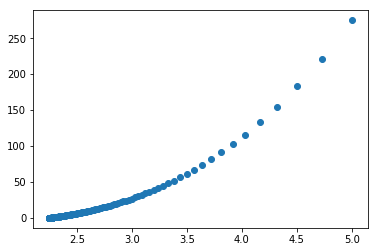

Local Minimum :  2.250048101595436


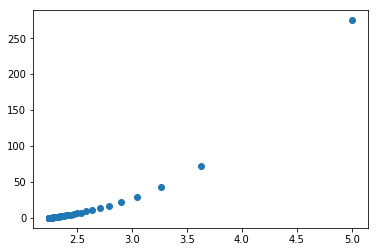

Local Minimum :  2.250008798891712


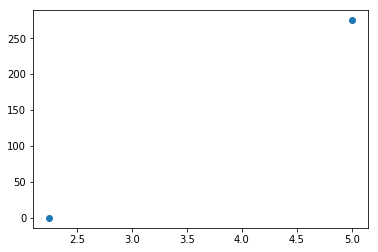

Local Minimum :  2.25


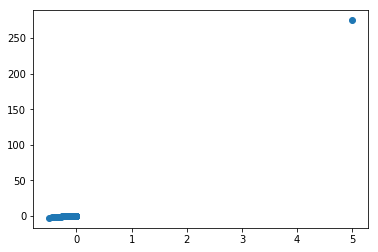

Local Minimum :  -0.0023546793550266306


In [21]:
import matplotlib.pyplot as plt

def cost_function(x):
    return 4*x**3 - 9*x**2

precision = 0.000001

for lr in [0.001,0.005,0.01,0.02]:
    
    x_list = list()
    x_old = 0
    x_new = 5
    
    while abs(x_new-x_old) > precision:
        x_old = x_new
        x_list.append(x_old)
        x_new = x_old - lr * cost_function(x_old)
        
    y_list = list(map(cost_function,x_list))
    plt.scatter(x_list,y_list)
    plt.show()
    print("Local Minimum : ",x_new)

## 회귀 분석에서의 경사 하강법
- 선형 회귀 분석에서의 비용 함수 RSS는 2차 함수이면서 볼록 함수(convex function)이므로, 별도의 지역 최소값이 없고 1개의 전역 최소값만 존재
- 따라서 선형 회귀에서는 경사 하강법을 이용하여 RSS의 전역 최소값을 구할 수 있음

## 경사 하강법의 유형
경사 하강법은 배치 크기와 적용에 따라서 크게 3종류로 구분

###  배치 경사 하강법 (batch gradient descent)
- 경사를 1회 계산하기 위해서 전체 학습 데이터를 사용
- 1개의 배치에 전체 학습 데이터가 모두 들어감
- 가지고 있는 모든 리소스를 사용
- 엄청 느림

### 확률적 경사 하강법 (SGD; stochastic gradient descent)
- 경사를 1회 계산하기 위해서 **1개의 학습 데이터**를 사용
- 1개의 배치에 임의의 학습 데이터 1개만 들어감
- 아무거나 무작위로 랜덤하게
- 엄청 빠르긴 함

### 미니배치 경사 하강법 (mini-batch gradient descent)
- 경사를 1회 계산하기 위해서 일부 학습 데이터를 사용
- 1개의 배치에 임의의 학습 데이터 여러 개가 들어감
- 배치 경사 하강법과 확률적 경사 하강법 사이에 있는 방법
- 데이터를 어느 정도 쪼개서

![](../img/gradient-descent5.png)

---

## 배치 (Batch)
- 1회의 경사 업데이트에 사용되는 데이터 집합
- 이 때 사용되는 데이터 집합의 개수를 배치 크기
- 가중치는 한번의 배치가 돌때마다 업데이트 되는 것
- 예를 들어, 전체 데이터가 100개 있을 때 배치 크기가 20이면 1개의 배치마다 20개의 데이터가 있다. 배치는 총 5개가 있고, 경사는 5회 업데이트

--- 
 
## 에폭 (Epoch)
- 전체 데이터들을 한 번 사용한 횟수, 즉 학습의 반복 횟수
- 예) 데이터 100개, 배치가 5개일 때 에폭이 1000이면 학습이 총 1000회 수행된다. 경사는 총 5000회 업데이트